# MLP dropout comparison
Dropout is found to be the preferred regularization technique for neural networks. This notebook investigates the appropriate dropout rate for MLP models

In [1]:
# %load 3_mlp_dout_comp.py
import src.core as mlModule
import src.core_configs as configs

Using TensorFlow backend.


In [2]:
def initTrainPredict(modelList, retrain=False, plot=True, interpol=False):
    # 4. Initiate and train models
    mlModule.initModels(modelList)
    mlModule.trainModels(retrain)

    # 5. Predict
    modelNames, metrics_train, metrics_test, columnsList, deviationsList = mlModule.predictWithModels(
        plot=plot,
        interpol=interpol,
    )

In [3]:
def pred(facility, model, resolution):
    filename, columns, irrelevantColumns, targetColumns, traintime, testtime, columnOrder = configs.getConfig(facility, model, resolution)

    df = mlModule.initDataframe(filename, columns, irrelevantColumns)
    df_train, df_test = mlModule.getTestTrainSplit(traintime, testtime)
    X_train, y_train, X_test, y_test = mlModule.getFeatureTargetSplit(targetColumns)

    mlpr_1_1 = mlModule.MLP('MLP 1x128 d0.0'+' mod'+model, layers=[128], dropout=0.0, epochs=5000)
    mlpr_1_2 = mlModule.MLP('MLP 1x128 d0.1'+' mod'+model, layers=[128], dropout=0.1, epochs=5000)
    mlpr_1_3 = mlModule.MLP('MLP 1x128 d0.2'+' mod'+model, layers=[128], dropout=0.2, epochs=5000)
    mlpr_1_4 = mlModule.MLP('MLP 1x128 d0.3'+' mod'+model, layers=[128], dropout=0.3, epochs=5000)
    mlpr_1_5 = mlModule.MLP('MLP 1x128 d0.4'+' mod'+model, layers=[128], dropout=0.4, epochs=5000)
    mlpr_1_6 = mlModule.MLP('MLP 1x128 d0.5'+' mod'+model, layers=[128], dropout=0.5, epochs=5000)
    linear = mlModule.Linear_Regularized('Linear rCV mod'+model)

    initTrainPredict([
        linear, mlpr_1_1, mlpr_1_2, mlpr_1_3, mlpr_1_4, mlpr_1_5, mlpr_1_6,
    ])

# Dataset D, predictive model A

Columns before removal: 
Col. 0 : 20TT001 - Process Inlet Temperature
Col. 1 : 20PT001 - Process Inlet Pressure
Col. 2 : 20FT001 - Process Flow Rate
Col. 3 : 20TT002 - Process Outlet Temperature
Col. 4 : 20PDT001 - Process Pressure Difference
Col. 5 : 50TT001 - Coolant Inlet Temperature
Col. 6 : 50PT001 - Coolant Inlet Pressure
Col. 7 : 50FT001 - Coolant Flow Rate
Col. 8 : 50TT002 - Coolant Outlet Temperature
Col. 9 : 50PDT001 - Coolant Pressure Difference
Col. 10 : 50TV001 - Coolant Valve Opening

Columns after removal: 
Col. 0 : 20TT001 - Process Inlet Temperature
Col. 1 : 20FT001 - Process Flow Rate
Col. 2 : 20TT002 - Process Outlet Temperature
Col. 3 : 50TT001 - Coolant Inlet Temperature
Col. 4 : 50TT002 - Coolant Outlet Temperature

Finding data between 2020-01-01 00:00:00 and 2020-03-20 00:00:00
Found 315 rows

Finding data between 2020-01-01 00:00:00 and 2020-08-01 00:00:00
Found 726 rows

Training model Linear rCV modA
    Trained weights for Linear rCV modA:
[[-0.14580221 -0.9

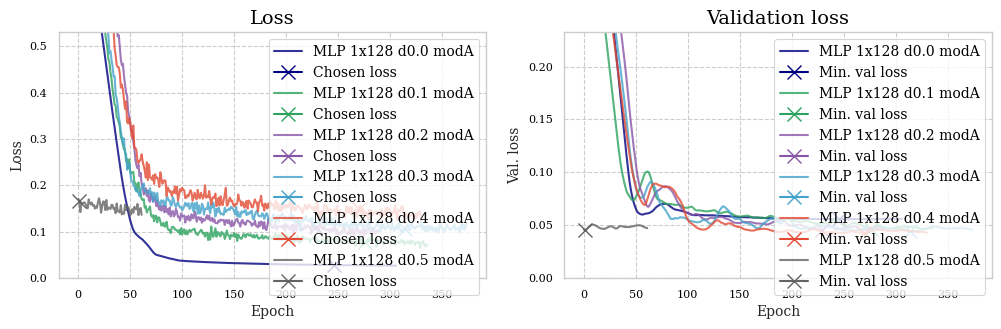

Model prediction scores
+---------------------+-------------+------------+
|        Model        | Train score | Test score |
+---------------------+-------------+------------+
|   Linear rCV modA   |    0.9947   |   0.8842   |
| MLP 1x128 d0.0 modA |    0.9978   |   0.8894   |
| MLP 1x128 d0.1 modA |    0.9979   |   0.8779   |
| MLP 1x128 d0.2 modA |    0.9974   |   0.8309   |
| MLP 1x128 d0.3 modA |    0.9973   |   0.653    |
| MLP 1x128 d0.4 modA |    0.9968   |   0.894    |
| MLP 1x128 d0.5 modA |    0.9955   |   0.7372   |
+---------------------+-------------+------------+


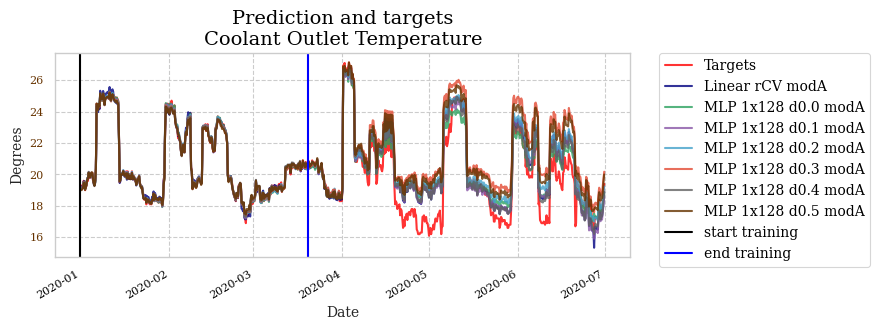

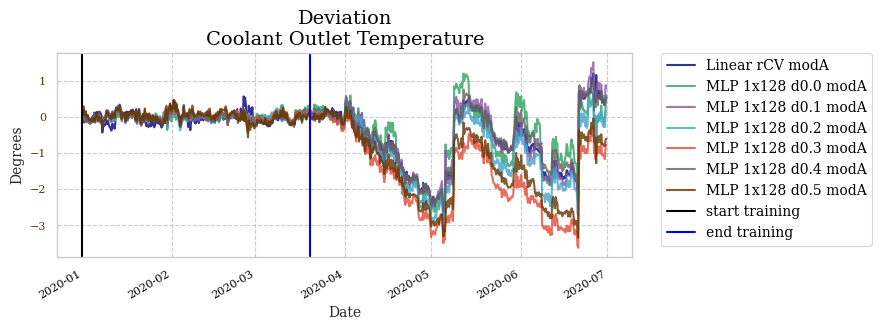

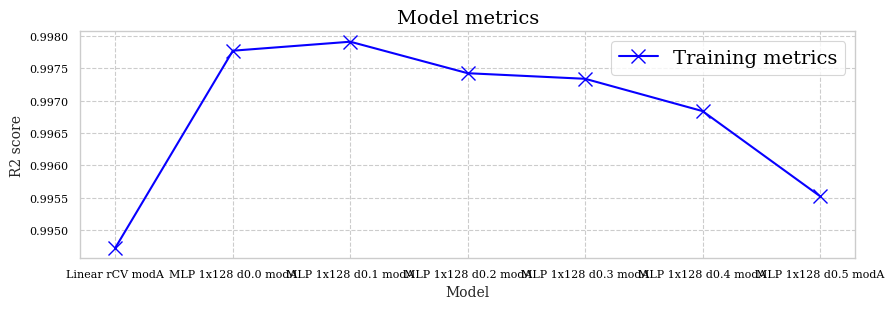

In [4]:
pred('D', 'A', '30min')

In [5]:
mlModule.reset()

# Dataset D, predictive model B

Columns before removal: 
Col. 0 : 20TT001 - Process Inlet Temperature
Col. 1 : 20PT001 - Process Inlet Pressure
Col. 2 : 20FT001 - Process Flow Rate
Col. 3 : 20TT002 - Process Outlet Temperature
Col. 4 : 20PDT001 - Process Pressure Difference
Col. 5 : 50TT001 - Coolant Inlet Temperature
Col. 6 : 50PT001 - Coolant Inlet Pressure
Col. 7 : 50FT001 - Coolant Flow Rate
Col. 8 : 50TT002 - Coolant Outlet Temperature
Col. 9 : 50PDT001 - Coolant Pressure Difference
Col. 10 : 50TV001 - Coolant Valve Opening

Columns after removal: 
Col. 0 : 20TT001 - Process Inlet Temperature
Col. 1 : 20FT001 - Process Flow Rate
Col. 2 : 20TT002 - Process Outlet Temperature
Col. 3 : 50TT001 - Coolant Inlet Temperature
Col. 4 : 50TT002 - Coolant Outlet Temperature
Col. 5 : 50TV001 - Coolant Valve Opening

Finding data between 2020-01-01 00:00:00 and 2020-03-20 00:00:00
Found 315 rows

Finding data between 2020-01-01 00:00:00 and 2020-08-01 00:00:00
Found 726 rows

Training model Linear rCV modB
    Trained weight

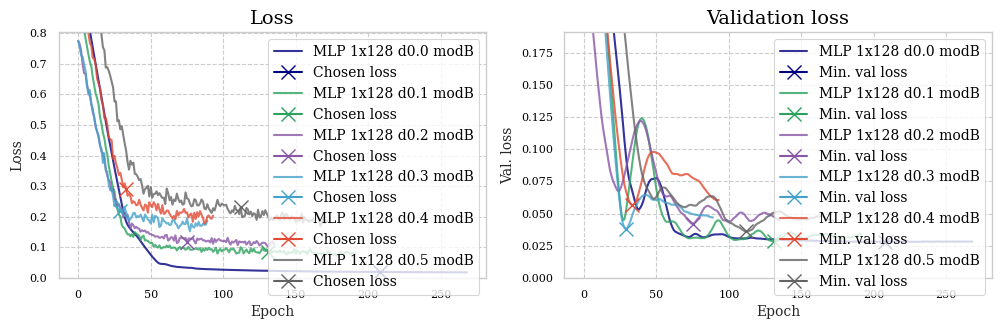

Model prediction scores
+---------------------+-------------+------------+
|        Model        | Train score | Test score |
+---------------------+-------------+------------+
|   Linear rCV modB   |    0.9963   |   0.922    |
| MLP 1x128 d0.0 modB |    0.9991   |   0.9431   |
| MLP 1x128 d0.1 modB |    0.9981   |   0.9275   |
| MLP 1x128 d0.2 modB |    0.9972   |   0.8962   |
| MLP 1x128 d0.3 modB |    0.9794   |   0.9302   |
| MLP 1x128 d0.4 modB |    0.9432   |   0.8726   |
| MLP 1x128 d0.5 modB |    0.9959   |   0.9406   |
+---------------------+-------------+------------+


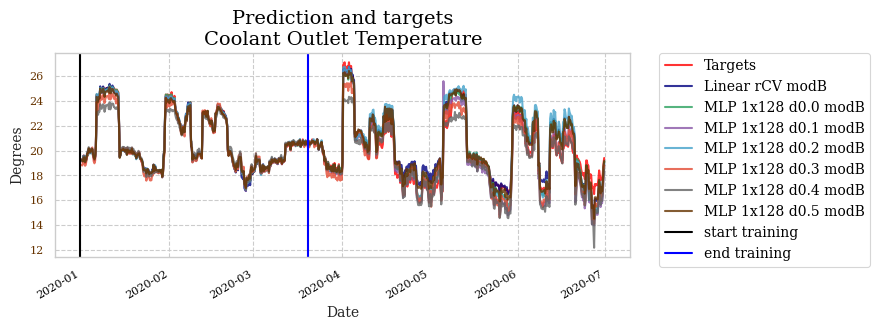

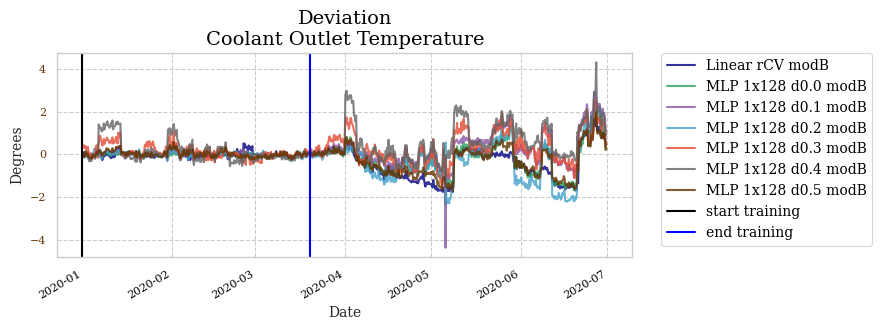

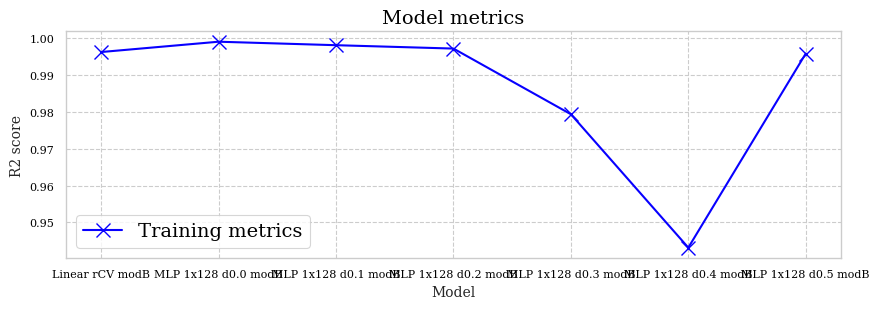

In [6]:
pred('D', 'B', '30min')

In [7]:
mlModule.reset()

# Dataset F, predictive model A, 30min

Columns before removal: 
Col. 0 : FYN0111 - Process Flow Rate
Col. 1 : TT0102_MA_Y - Process Inlet Temperature A
Col. 2 : TIC0101_CA_YX - Process Outlet Temperature A
Col. 3 : TT0104_MA_Y - Process Inlet Temperature B
Col. 4 : TIC0103_CA_YX - Process Outlet Temperature B
Col. 5 : TT0106_MA_Y - Process Inlet Temperature C
Col. 6 : TIC0105_CA_YX - Process Outlet Temperature C
Col. 7 : PDT0108_MA_Y - Process A Pressure Difference
Col. 8 : PDT0119_MA_Y - Process B Pressure Difference
Col. 9 : PDT0118_MA_Y - Process C Pressure Difference
Col. 10 : PIC0104_CA_YX - Separator Inlet Pressure
Col. 11 : TIC0425_CA_YX - Coolant Inlet Temperature
Col. 12 : TT0651_MA_Y - Coolant Outlet Temperature A
Col. 13 : TT0652_MA_Y - Coolant Outlet Temperature B
Col. 14 : TT0653_MA_Y - Coolant Outlet Temperature C
Col. 15 : TIC0101_CA_Y - Coolant Valve Opening A
Col. 16 : TIC0103_CA_Y - Coolant Valve Opening B
Col. 17 : TIC0105_CA_Y - Coolant Valve Opening C

Columns after removal: 
Col. 0 : FYN0111 - Process 

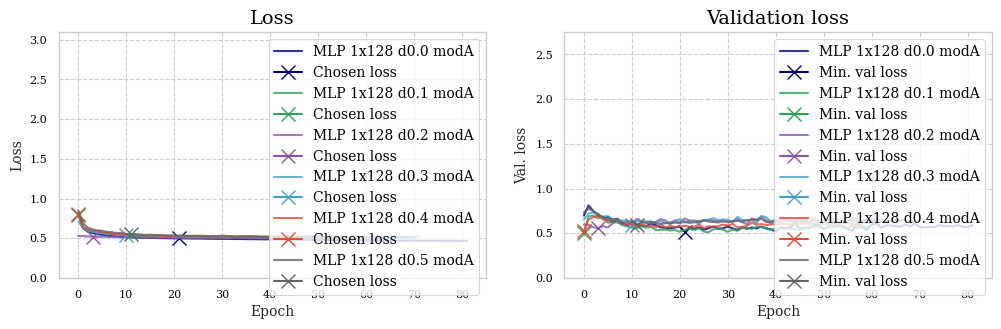

Model prediction scores
+---------------------+-------------+------------+
|        Model        | Train score | Test score |
+---------------------+-------------+------------+
|   Linear rCV modA   |    0.3234   |   0.0673   |
| MLP 1x128 d0.0 modA |    0.4482   |   0.0374   |
| MLP 1x128 d0.1 modA |    0.286    |  -0.0119   |
| MLP 1x128 d0.2 modA |    0.4342   |  -0.0405   |
| MLP 1x128 d0.3 modA |    0.4196   |  -0.0765   |
| MLP 1x128 d0.4 modA |    0.2512   |   0.0302   |
| MLP 1x128 d0.5 modA |     0.42    |  -0.0364   |
+---------------------+-------------+------------+


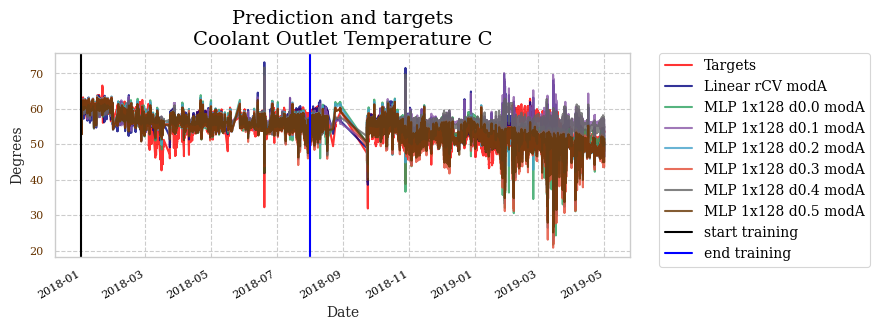

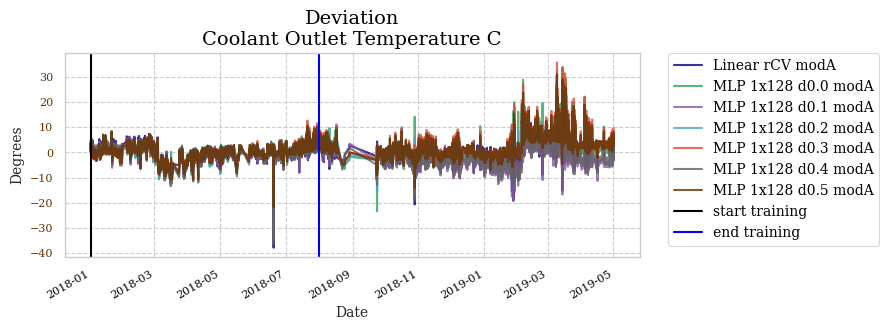

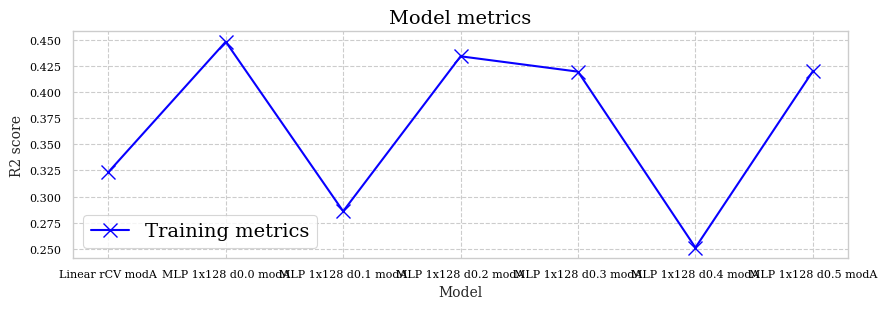

In [8]:
pred('F', 'A', '30min')

In [9]:
mlModule.reset()

# Dataset F, predictive model B, 30min

Columns before removal: 
Col. 0 : FYN0111 - Process Flow Rate
Col. 1 : TT0102_MA_Y - Process Inlet Temperature A
Col. 2 : TIC0101_CA_YX - Process Outlet Temperature A
Col. 3 : TT0104_MA_Y - Process Inlet Temperature B
Col. 4 : TIC0103_CA_YX - Process Outlet Temperature B
Col. 5 : TT0106_MA_Y - Process Inlet Temperature C
Col. 6 : TIC0105_CA_YX - Process Outlet Temperature C
Col. 7 : PDT0108_MA_Y - Process A Pressure Difference
Col. 8 : PDT0119_MA_Y - Process B Pressure Difference
Col. 9 : PDT0118_MA_Y - Process C Pressure Difference
Col. 10 : PIC0104_CA_YX - Separator Inlet Pressure
Col. 11 : TIC0425_CA_YX - Coolant Inlet Temperature
Col. 12 : TT0651_MA_Y - Coolant Outlet Temperature A
Col. 13 : TT0652_MA_Y - Coolant Outlet Temperature B
Col. 14 : TT0653_MA_Y - Coolant Outlet Temperature C
Col. 15 : TIC0101_CA_Y - Coolant Valve Opening A
Col. 16 : TIC0103_CA_Y - Coolant Valve Opening B
Col. 17 : TIC0105_CA_Y - Coolant Valve Opening C

Columns after removal: 
Col. 0 : FYN0111 - Process 

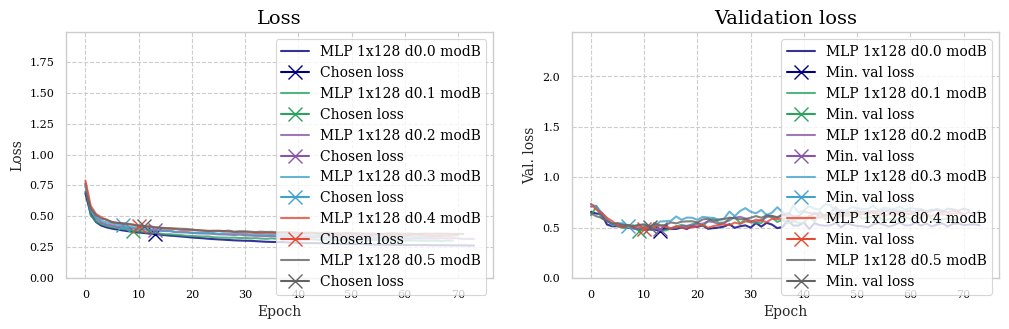

Model prediction scores
+---------------------+-------------+------------+
|        Model        | Train score | Test score |
+---------------------+-------------+------------+
|   Linear rCV modB   |    0.6158   |   0.5949   |
| MLP 1x128 d0.0 modB |    0.7345   |   0.5317   |
| MLP 1x128 d0.1 modB |    0.7181   |   0.4892   |
| MLP 1x128 d0.2 modB |    0.7187   |   0.5298   |
| MLP 1x128 d0.3 modB |    0.6934   |   0.4555   |
| MLP 1x128 d0.4 modB |    0.6999   |   0.5463   |
| MLP 1x128 d0.5 modB |    0.7062   |   0.4799   |
+---------------------+-------------+------------+


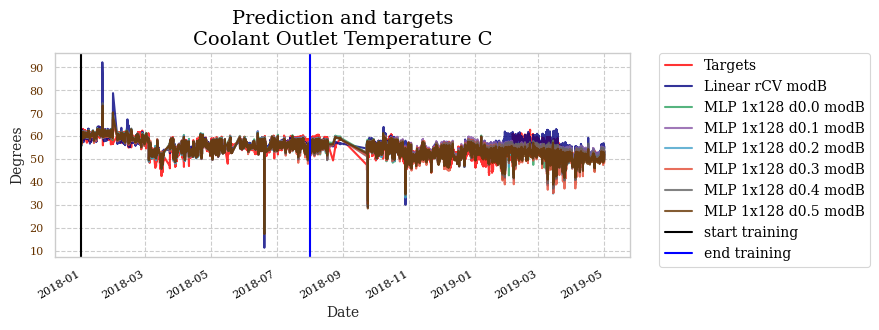

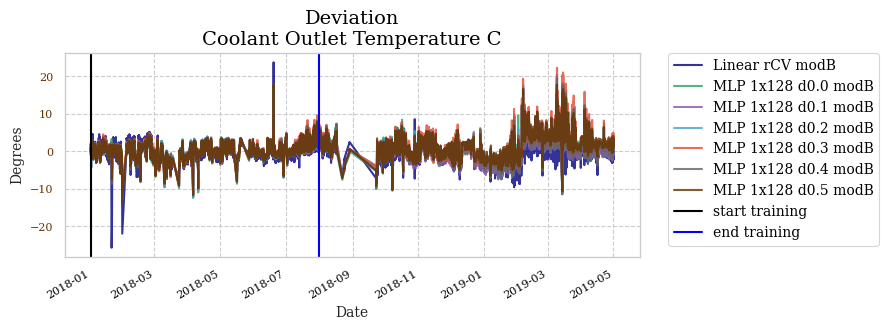

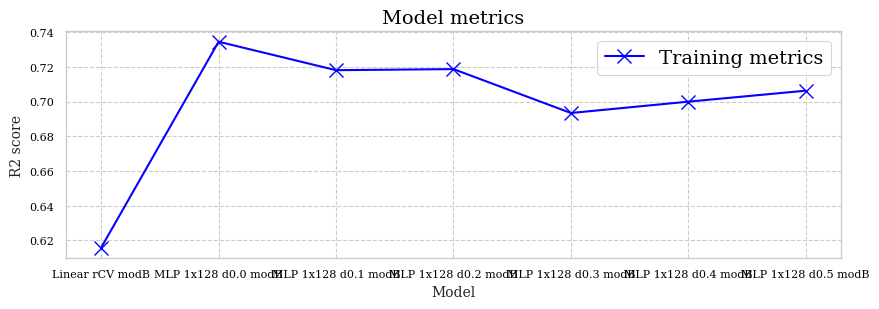

In [10]:
pred('F', 'B', '30min')

In [11]:
mlModule.reset()

# Dataset G, predictive model A, 30min

Columns before removal: 
Col. 0 : PDI0064 - Process Pressure Difference
Col. 1 : TI0066 - Process Outlet Temperature
Col. 2 : TZI0012 - Process Inlet Temperature
Col. 3 : FI0010 - Process Flow Rate
Col. 4 : TT0025 - Coolant Inlet Temperature
Col. 5 : TT0026 - Coolant Outlet Temperature
Col. 6 : PI0001 - Coolant Inlet Pressure
Col. 7 : FI0027 - Coolant Flow Rate
Col. 8 : TIC0022U - Coolant Valve Opening
Col. 9 : PDT0024 - Coolant Pressure Difference

Columns after removal: 
Col. 0 : TI0066 - Process Outlet Temperature
Col. 1 : TZI0012 - Process Inlet Temperature
Col. 2 : FI0010 - Process Flow Rate
Col. 3 : TT0025 - Coolant Inlet Temperature
Col. 4 : TT0026 - Coolant Outlet Temperature

Finding data between 2019-04-24 00:00:00 and 2019-08-01 00:00:00
Found 4232 rows

Finding data between 2017-01-01 00:00:00 and 2020-03-01 00:00:00
Found 49290 rows

Training model Linear rCV modA
    Trained weights for Linear rCV modA:
[[ 0.26106655 -0.18036607 -0.74340497 -0.26854008]]
Model MLP 1x128 d

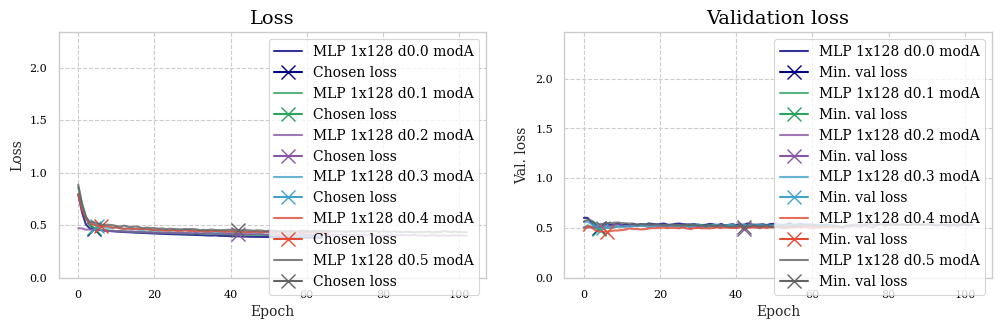

Model prediction scores
+---------------------+-------------+------------+
|        Model        | Train score | Test score |
+---------------------+-------------+------------+
|   Linear rCV modA   |    0.562    |  -1.2036   |
| MLP 1x128 d0.0 modA |    0.6065   |   -1.053   |
| MLP 1x128 d0.1 modA |    0.6072   |  -0.7483   |
| MLP 1x128 d0.2 modA |    0.6775   |  -1.8049   |
| MLP 1x128 d0.3 modA |    0.5964   |  -0.6909   |
| MLP 1x128 d0.4 modA |    0.6186   |  -0.8159   |
| MLP 1x128 d0.5 modA |    0.6545   |  -1.7561   |
+---------------------+-------------+------------+


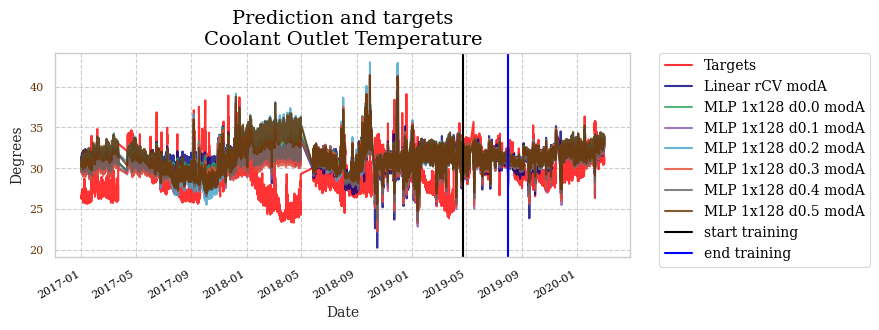

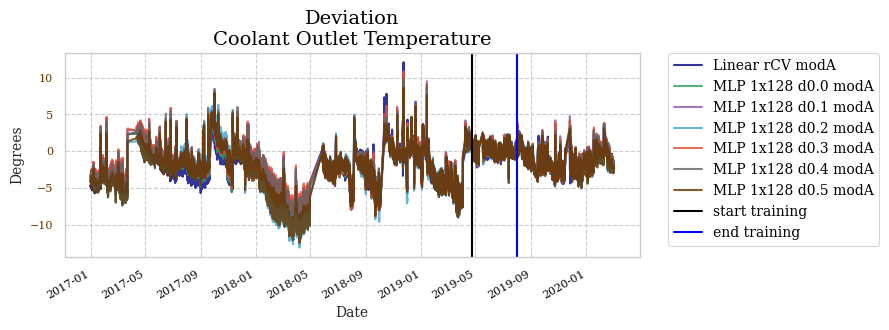

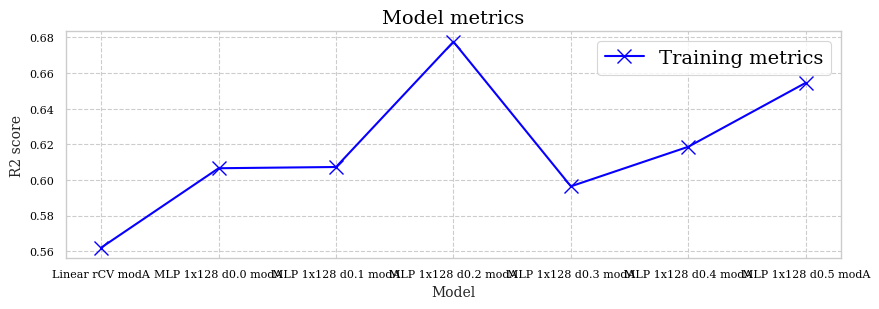

In [12]:
pred('G', 'A', '30min')

In [13]:
mlModule.reset()

# Dataset G, predictive model B, 30min

Columns before removal: 
Col. 0 : PDI0064 - Process Pressure Difference
Col. 1 : TI0066 - Process Outlet Temperature
Col. 2 : TZI0012 - Process Inlet Temperature
Col. 3 : FI0010 - Process Flow Rate
Col. 4 : TT0025 - Coolant Inlet Temperature
Col. 5 : TT0026 - Coolant Outlet Temperature
Col. 6 : PI0001 - Coolant Inlet Pressure
Col. 7 : FI0027 - Coolant Flow Rate
Col. 8 : TIC0022U - Coolant Valve Opening
Col. 9 : PDT0024 - Coolant Pressure Difference

Columns after removal: 
Col. 0 : TI0066 - Process Outlet Temperature
Col. 1 : TZI0012 - Process Inlet Temperature
Col. 2 : FI0010 - Process Flow Rate
Col. 3 : TT0025 - Coolant Inlet Temperature
Col. 4 : TT0026 - Coolant Outlet Temperature
Col. 5 : TIC0022U - Coolant Valve Opening

Finding data between 2019-04-24 00:00:00 and 2019-08-01 00:00:00
Found 4232 rows

Finding data between 2017-01-01 00:00:00 and 2020-03-01 00:00:00
Found 49290 rows

Training model Linear rCV modB
    Trained weights for Linear rCV modB:
[[ 0.28096044  0.0664614   

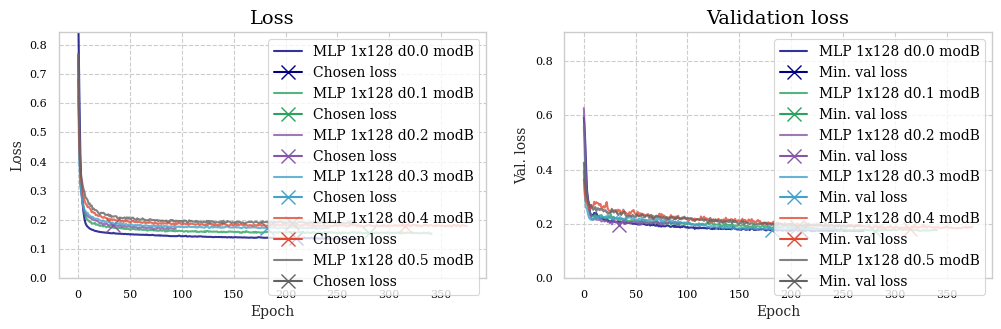

Model prediction scores
+---------------------+-------------+------------+
|        Model        | Train score | Test score |
+---------------------+-------------+------------+
|   Linear rCV modB   |    0.9235   |  -2.2699   |
| MLP 1x128 d0.0 modB |    0.9562   |  -1.4915   |
| MLP 1x128 d0.1 modB |    0.9541   |  -1.7691   |
| MLP 1x128 d0.2 modB |    0.9454   |   -1.587   |
| MLP 1x128 d0.3 modB |    0.9512   |  -2.1019   |
| MLP 1x128 d0.4 modB |    0.9503   |  -2.0695   |
| MLP 1x128 d0.5 modB |    0.9474   |  -1.9961   |
+---------------------+-------------+------------+


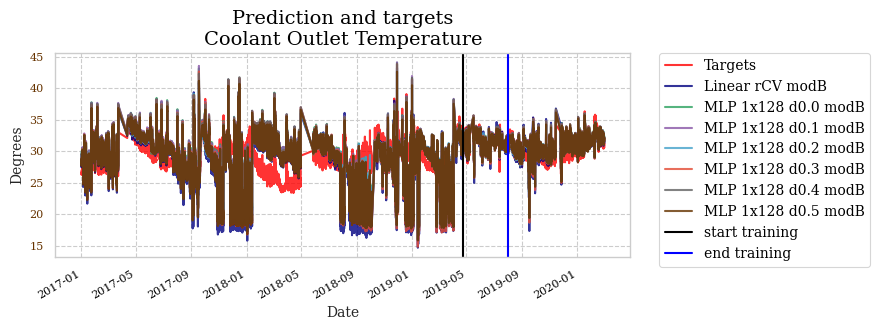

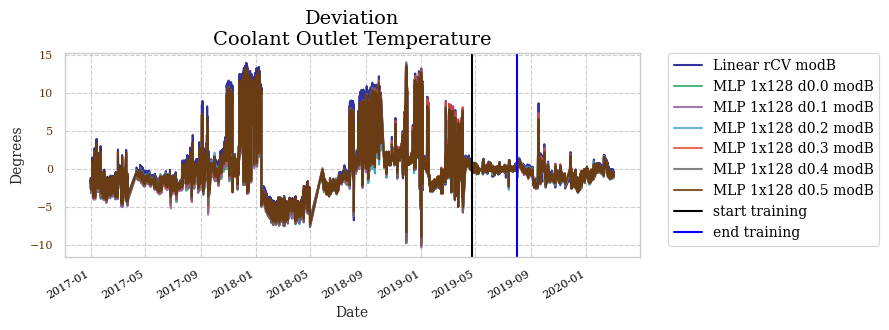

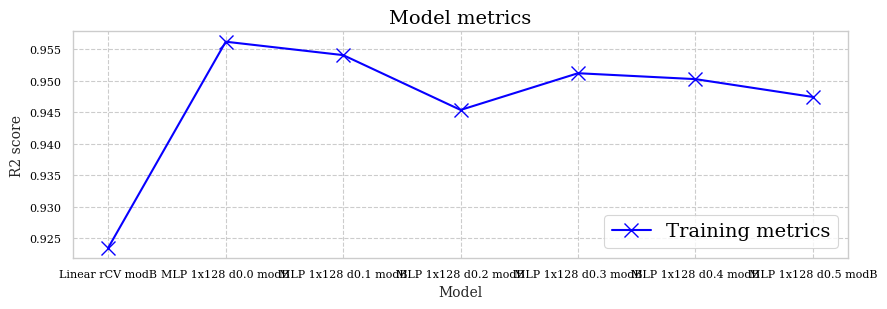

In [14]:
pred('G', 'B', '30min')

In [15]:
mlModule.reset()

# Conclusions
Comparable performance is found between different dropout rates. By inspecting the prediction and deviation graphs, it becomes apparent that some rates have converged to worse solutions than others. Models with dropout rates of 0.0, 0.3 and 0.4 show some clear shortcomings, either failing to accurately predict the training data, or making illogical predictions compared to the expected fouling pattern. The model using a dropout rate of 0.5 has converged to a very different solution than e.g. the model using 0.1 or 0.2. Overall, it is found that a dropout rate of 0.2 ensures satisfying regularization effects while converging quickly.